In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### dataset of clients that subscribed to membership card in a Mall

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


the Spending score is attributed for each customer based on his income, how much he spent on the mall ..., we want to make clusters of clients based on the Annual income and the spending score, no idea how many segments there would be, it's a clustering problem

In [5]:
len(dataset)

200

create an array of the two columns Annual income and Spending score

In [8]:
X = dataset.iloc[: , [3,4]].values  ## X = dataset.iloc[: , 3:].values

In [10]:
X[1:9]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3]], dtype=int64)

##### we need to find out how many clusters we gonna use with the
#### Elbow method
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [12]:
from sklearn.cluster import KMeans

to find out how many clusters, we gonna compute the WCSS : Within Cluster Sum of Squares for like 10 clusters 

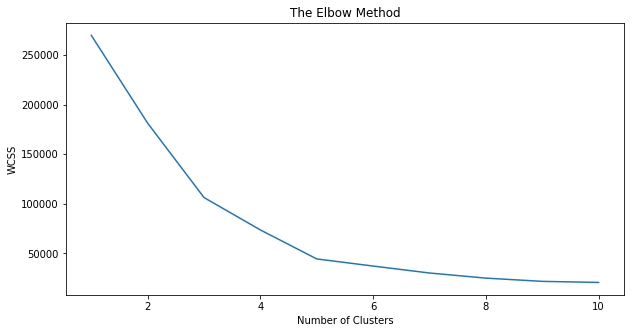

In [16]:
wcss = []
for i in range(1,11):
    ## create the mdoel (check the documentation)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    ## fit to X
    kmeans.fit(X)
    ## compute the WCSS with inertia_ and add to wcss list
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

we can clearly see that 5 is the optimal number of clusters for our problem

### Applying K-means to the mall data set with k=5 clusters

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [18]:
## fit predict method returns for each observation which cluster it belong to, it will return cluster numbers in a single vector
## y_kmeans
y_kmeans = kmeans.fit_predict(X)

In [20]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualizing the Clusters

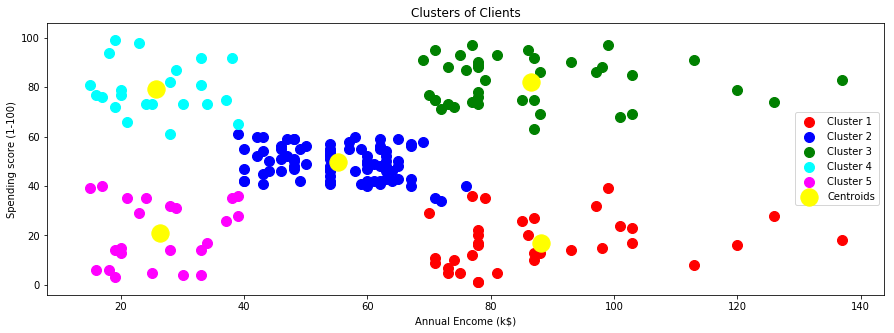

In [22]:
plt.figure(figsize=(15,5))
## X[y_kmeans==i, j] all observations that belong to cluster i,  j=0: 1st column, j=1: 2nd one
## s is to highly the points because we have a little bit large dataset
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1') 
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2') 
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3') 
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4') 
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Cluster 5') 
## centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Encome (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

In [23]:
## Rename clusters based on client characteristics (they gain a lot of money, they spend it a lot ...)

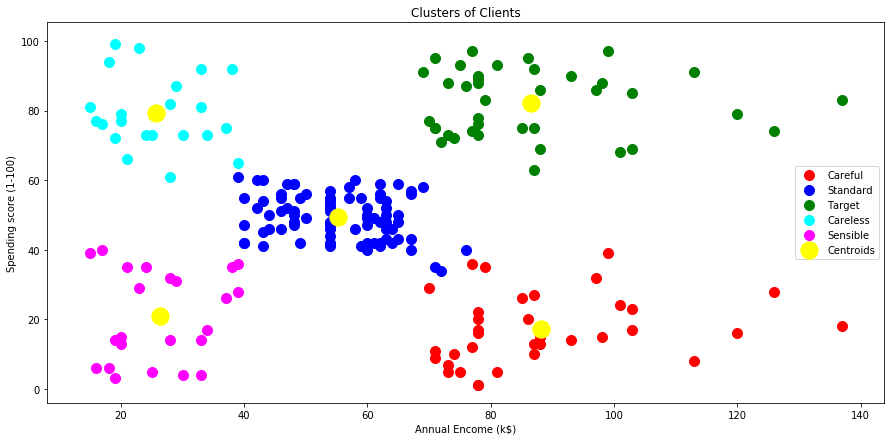

In [25]:
plt.figure(figsize=(15,7))
## X[y_kmeans==i, j] all observations that belong to cluster i,  j=0: 1st column, j=1: 2nd one
## s is to highly the points because we have a little bit large dataset
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Careful') 
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Standard') 
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Target') 
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='Careless') 
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='Sensible') 
## centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Encome (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()